# Data Science & Analytics Internship – Task 2
## E-Commerce Customer Behavior Analysis
Dataset: E-commerce Customer Behavior - Sheet1.csv


## 1. Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

plt.style.use('seaborn-v0_8')


## 2. Load Dataset & Clean Column Names

In [2]:

df = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

# Clean column names
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.lower()
)

print("Columns:", df.columns.tolist())
df.head()


Columns: ['customer_id', 'gender', 'age', 'city', 'membership_type', 'total_spend', 'items_purchased', 'average_rating', 'discount_applied', 'days_since_last_purchase', 'satisfaction_level']


,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


## 3. Basic Data Understanding

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               350 non-null    int64  
 1   gender                    350 non-null    str    
 2   age                       350 non-null    int64  
 3   city                      350 non-null    str    
 4   membership_type           350 non-null    str    
 5   total_spend               350 non-null    float64
 6   items_purchased           350 non-null    int64  
 7   average_rating            350 non-null    float64
 8   discount_applied          350 non-null    bool   
 9   days_since_last_purchase  350 non-null    int64  
 10  satisfaction_level        348 non-null    str    
dtypes: bool(1), float64(2), int64(4), str(4)
memory usage: 27.8 KB


In [4]:
df.describe()

,customer_id,age,total_spend,items_purchased,average_rating,days_since_last_purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


## 4. Data Cleaning

In [5]:
df.isnull().sum()

customer_id                 0
gender                      0
age                         0
city                        0
membership_type             0
total_spend                 0
items_purchased             0
average_rating              0
discount_applied            0
days_since_last_purchase    0
satisfaction_level          2
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:

# Outlier removal using IQR on total_spend
Q1 = df['total_spend'].quantile(0.25)
Q3 = df['total_spend'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['total_spend'] >= lower) & 
        (df['total_spend'] <= upper)]


## 5. Feature Engineering

In [8]:

# Age Group
df['age_group'] = pd.cut(df['age'],
                         bins=[0,25,40,60,100],
                         labels=['Young','Adult','Middle Age','Senior'])


In [9]:

# High Value Customer
threshold = df['total_spend'].mean()
df['high_value_customer'] = np.where(df['total_spend'] > threshold, 'Yes', 'No')


In [10]:

# Spend per Item
df['spend_per_item'] = df['total_spend'] / df['items_purchased']


In [11]:

# Rating Category
df['rating_category'] = df['average_rating'].apply(
    lambda x: 'Positive' if x >= 4 else 'Negative'
)


## 6. Exploratory Data Analysis

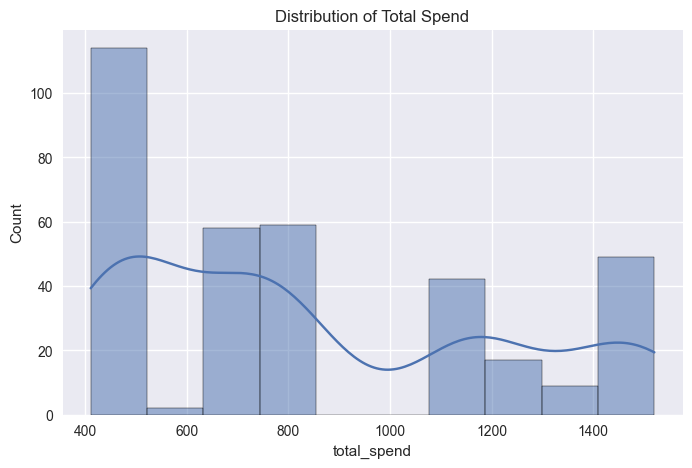

In [12]:

plt.figure(figsize=(8,5))
sns.histplot(df['total_spend'], kde=True)
plt.title("Distribution of Total Spend")
plt.show()


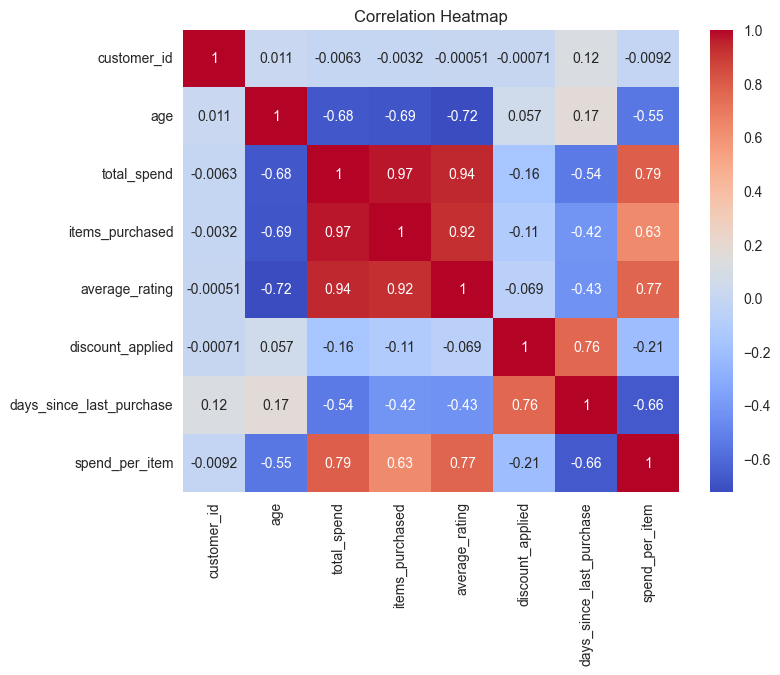

In [13]:

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


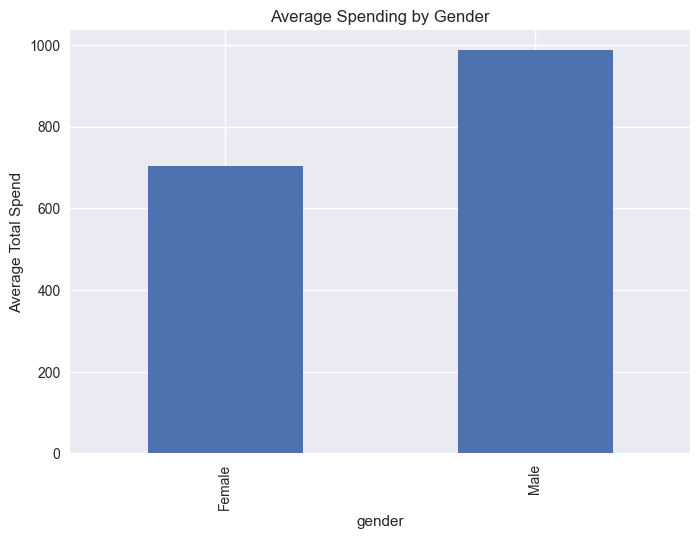

In [14]:

df.groupby('gender')['total_spend'].mean().plot(kind='bar')
plt.title("Average Spending by Gender")
plt.ylabel("Average Total Spend")
plt.show()


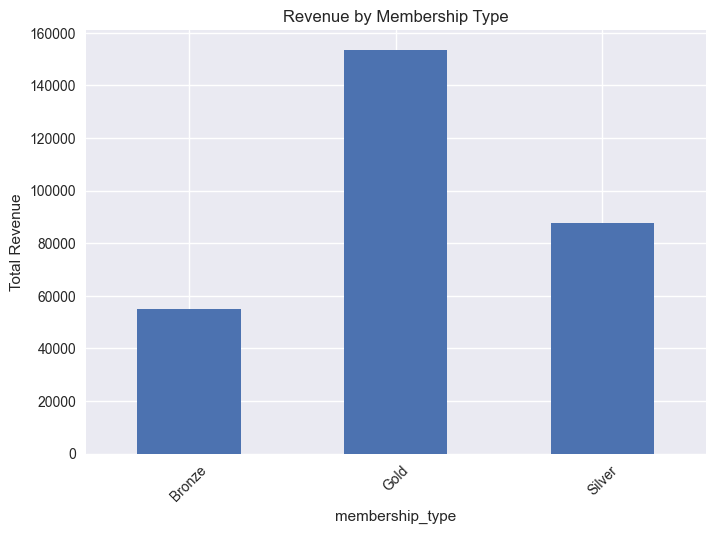

In [15]:

df.groupby('membership_type')['total_spend'].sum().plot(kind='bar')
plt.title("Revenue by Membership Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


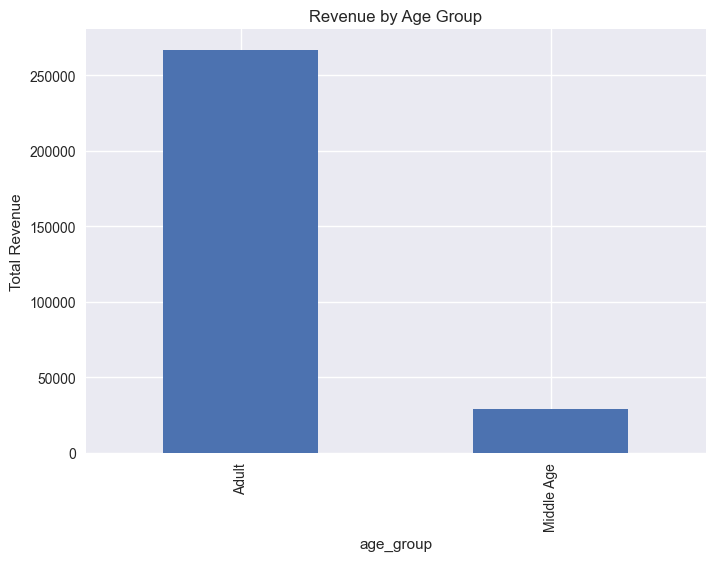

In [16]:

df.groupby('age_group')['total_spend'].sum().plot(kind='bar')
plt.title("Revenue by Age Group")
plt.ylabel("Total Revenue")
plt.show()


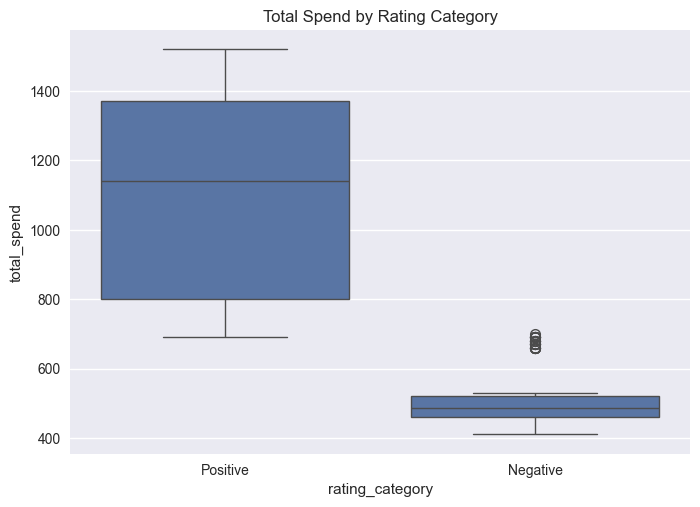

In [17]:

sns.boxplot(x='rating_category',
            y='total_spend',
            data=df)
plt.title("Total Spend by Rating Category")
plt.show()


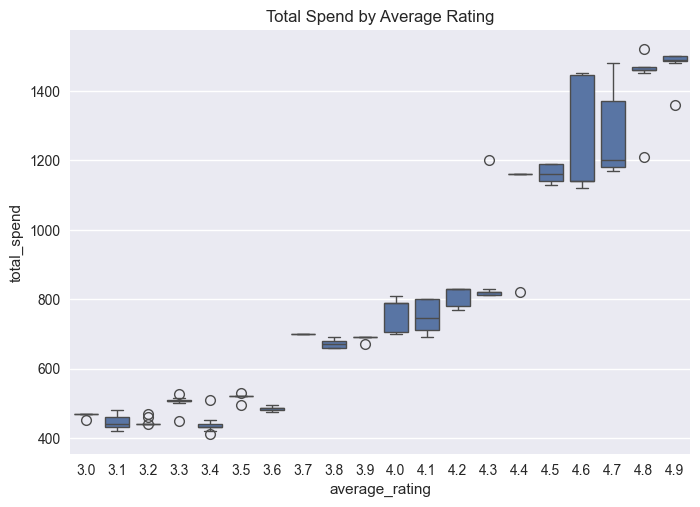

In [22]:
sns.boxplot(x='average_rating',
            y='total_spend',
            data=df)

plt.title("Total Spend by Average Rating")
plt.show()

## 7. Optional Predictive Modeling

In [21]:

X = df[['age', 'items_purchased', 'average_rating']]
y = df['total_spend']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))


R2 Score: 0.9609543694722141
MSE: 5279.620001278152


In [20]:

print("R2 Score:", r2_score(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))


R2 Score: 0.9609543694722141
MSE: 5279.620001278152



## 8. Key Insights

1. Membership type significantly influences total spending.
2. High-value customers contribute disproportionately to revenue.
3. Spending behavior varies across age groups.
4. Positive-rated customers tend to spend more.
5. Gender-based differences exist in spending patterns.
6. Revenue distribution is slightly right-skewed.
7. Recency impacts purchasing intensity.
8. Spend-per-item highlights premium buying behavior.

## 9. Conclusion

This analysis provides data-driven insights into customer segmentation, 
revenue drivers, and purchasing behavior. The findings support strategic 
decision-making in marketing, customer retention, and revenue optimization.
